# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [56]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [57]:
# import from google colab
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
df = pd.read_csv('/content/drive/MyDrive/Regression and Prediction/Project2/ExtraaLearn.csv')

## Data Overview



In [59]:
# display first few rows of the dataset
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [60]:
df.shape # get the shape of data

(4612, 15)

**Observation:**

* The dataset has 4612 entries and 15 columns.

In [61]:
# get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

* The dataset has 4612 entries and 15 columns.
* All columns have 4612 non-null entries. This means there are no missing
  values in the dataset.
* 5 columns are numerical (age, website_visits, time_spent_on_website,
  page_views_per_visit, and status).
* The remaining 10 columns are categorical (ID, current_occupation,
  first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, and referral).



In [62]:
df.describe() # get summary statistics for numerical columns

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


**Observations:**

* age: Values range from 18 to 63 years. The mean age is approximately 46.2
  years.
* website_visits: Values range from 0 to 30 visits. The mean number of visits is approximately 3.57.
* time_spent_on_website: Values range from 0 to 2537 seconds. The mean time
  spent is approximately 724 seconds.
* page_views_per_visit: Values range from 0 to 18.43 views. The mean number of
  page views per visit is approximately 3.03.
* status: This is the target variable, indicating whether the lead converted
  to a paid customer or not. The mean value of approximately 0.30 suggests that about 30% of leads converted.


In [63]:
df.isnull().sum() #check null values

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

**Observation:**

* There are no missing values in the dataset.

In [64]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


**Observation:**

* There are no duplicate rows in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Exploratory Data Analysis (EDA)



In [65]:
df.head() #show first 5 rows of the dataset

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


# How does current occupation affect lead status?

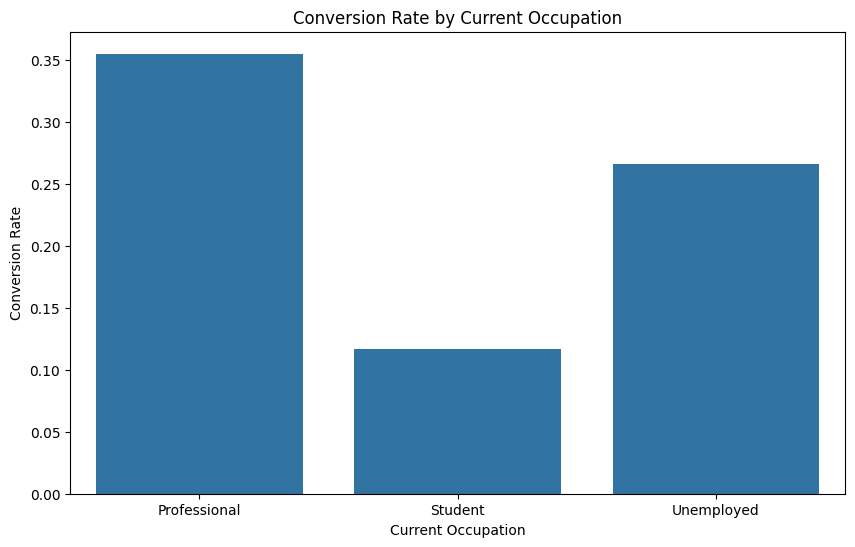

In [66]:
# conversion rate for each occupation
occupation_conversion = df.groupby('current_occupation')['status'].mean().reset_index()

# plot the conversion rate
plt.figure(figsize=(10, 6))
sns.barplot(x='current_occupation', y='status', data=occupation_conversion)
plt.title('Conversion Rate by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Conversion Rate')
plt.show()


**Observation:**

* Professionals have the highest conversion rate, with approximately 35% of leads converting to paid customers.
* Unemployed individuals have a moderate conversion rate, with approximately 25% of leads converting.
* Students have the lowest conversion rate, with approximately 12% of leads converting.

# Do the first channels of interaction have an impact on the lead status?

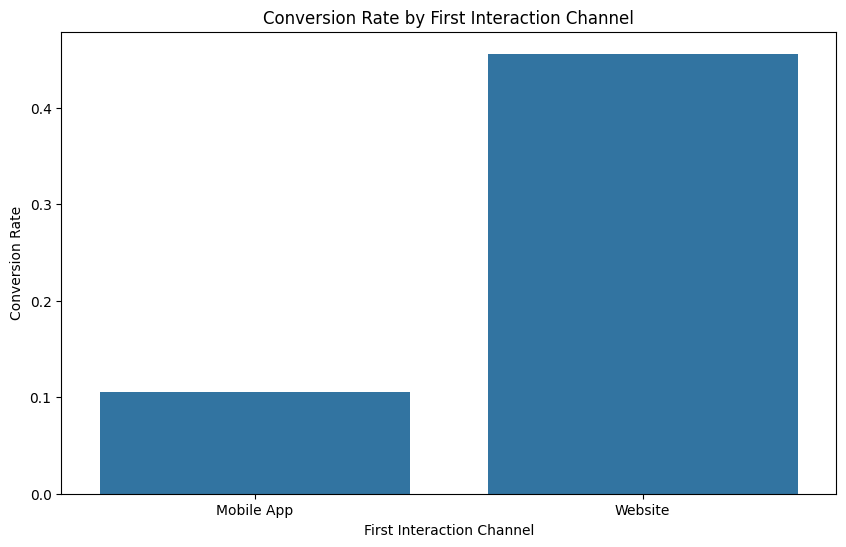

In [67]:
# conversion rate for each first interaction channel
interaction_conversion = df.groupby('first_interaction')['status'].mean().reset_index()

# plot the conversion rate
plt.figure(figsize=(10, 6))
sns.barplot(x='first_interaction', y='status', data=interaction_conversion)
plt.title('Conversion Rate by First Interaction Channel')
plt.xlabel('First Interaction Channel')
plt.ylabel('Conversion Rate')
plt.show()


**Observation:**

* Website as the first interaction channel has a significantly higher conversion rate, with approximately 45% of leads converting to paid customers.
* Mobile App as the first interaction channel has a lower conversion rate, with approximately 10% of leads converting.


# Which way of interaction works best?

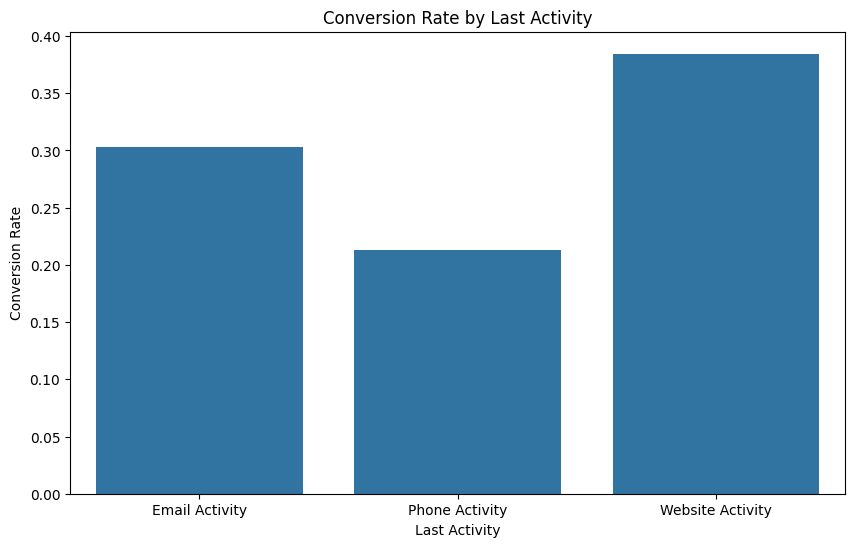

In [68]:
# conversion rate for each last interaction method
activity_conversion = df.groupby('last_activity')['status'].mean().reset_index()

# Plot the conversion rate
plt.figure(figsize=(10, 6))
sns.barplot(x='last_activity', y='status', data=activity_conversion)
plt.title('Conversion Rate by Last Activity')
plt.xlabel('Last Activity')
plt.ylabel('Conversion Rate')
plt.show()


**Observation:**

* Website Activity has the highest conversion rate, with approximately 37% of leads converting to paid customers.


# Which channels have the highest lead conversion rate?

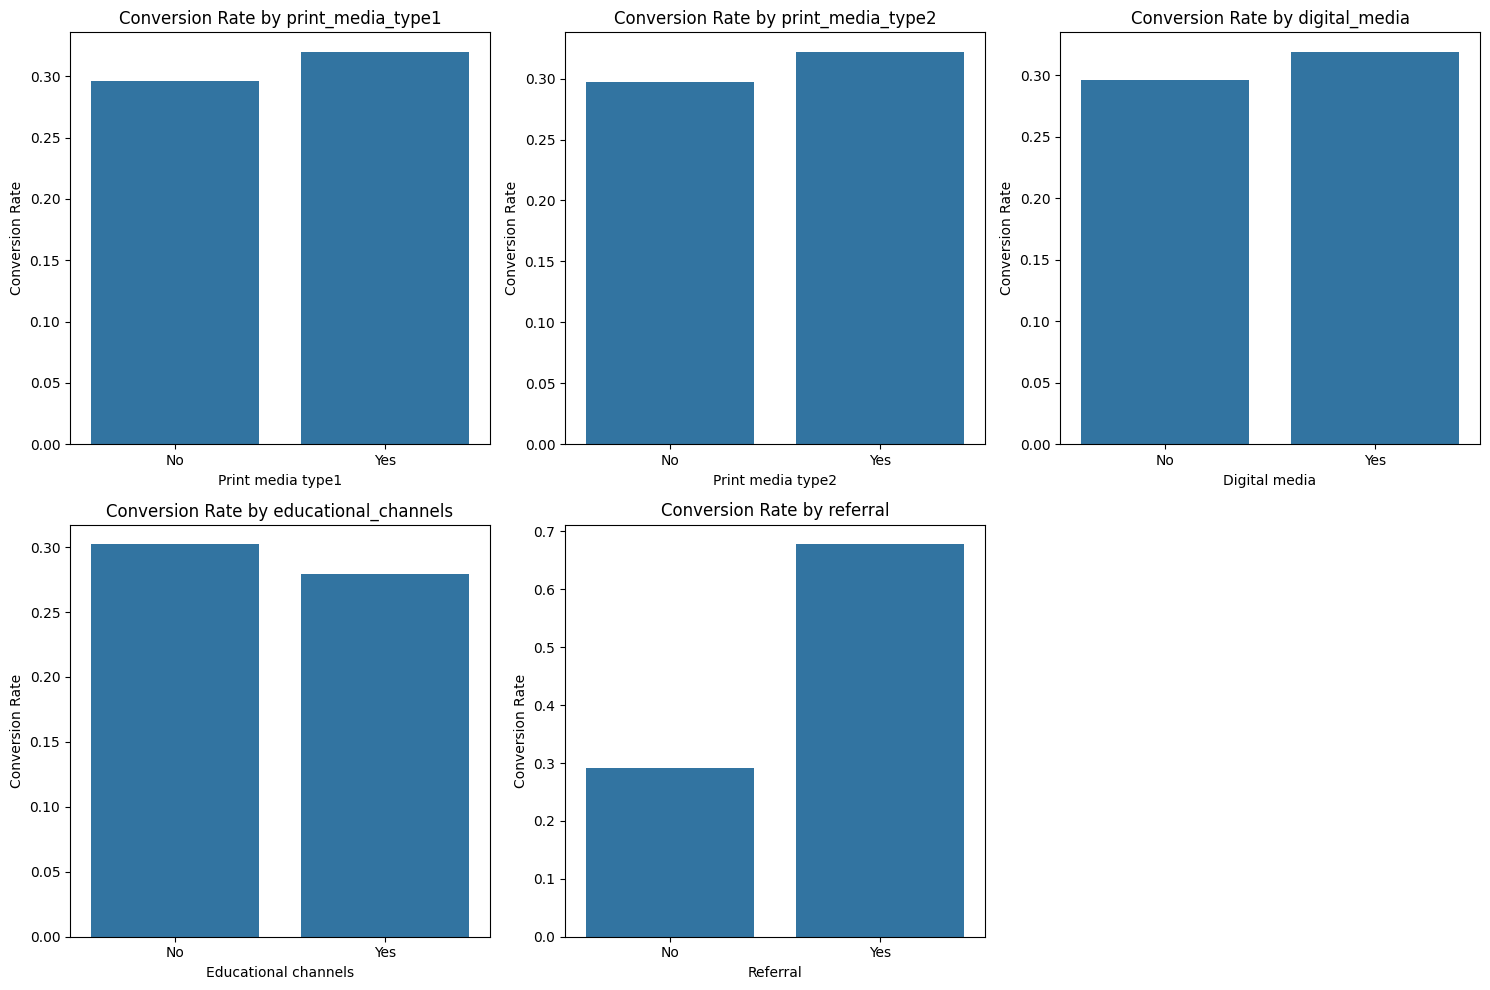

In [69]:
# define the marketing channels
channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# plot the conversion rate for each channel
plt.figure(figsize=(15, 10))

for i, channel in enumerate(channels, 1):
    plt.subplot(2, 3, i)
    channel_conversion = df.groupby(channel)['status'].mean().reset_index()
    sns.barplot(x=channel, y='status', data=channel_conversion)
    plt.title(f'Conversion Rate by {channel}')
    plt.xlabel(channel.replace('_', ' ').capitalize())
    plt.ylabel('Conversion Rate')

plt.tight_layout()
plt.show()


**Observation:**

* The conversion rate is significantly higher for leads who heard about ExtraaLearn through a referral (approximately 70%) compared to those who did not (approximately 30%). This suggests that referrals are highly effective in converting leads to paid customers.


# Does having more details about a prospect increase the chances of conversion?

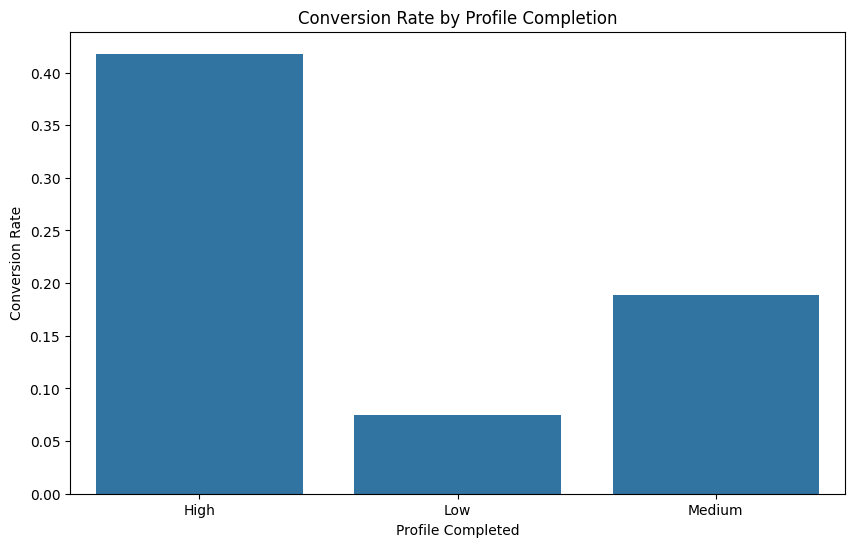

In [70]:
# conversion rate for each level of profile completion
profile_conversion = df.groupby('profile_completed')['status'].mean().reset_index()

# plot the conversion rate
plt.figure(figsize=(10, 6))
sns.barplot(x='profile_completed', y='status', data=profile_conversion)
plt.title('Conversion Rate by Profile Completion')
plt.xlabel('Profile Completed')
plt.ylabel('Conversion Rate')
plt.show()


**Observation:**

* Leads with a high level of profile completion have the highest conversion rate, with over 40% of these leads converting to paid customers.
* Leads with a low level of profile completion have the lowest conversion rate, with only around 5% of these leads converting.


# Additional Analyses to Perform (Bivariate Analysis)

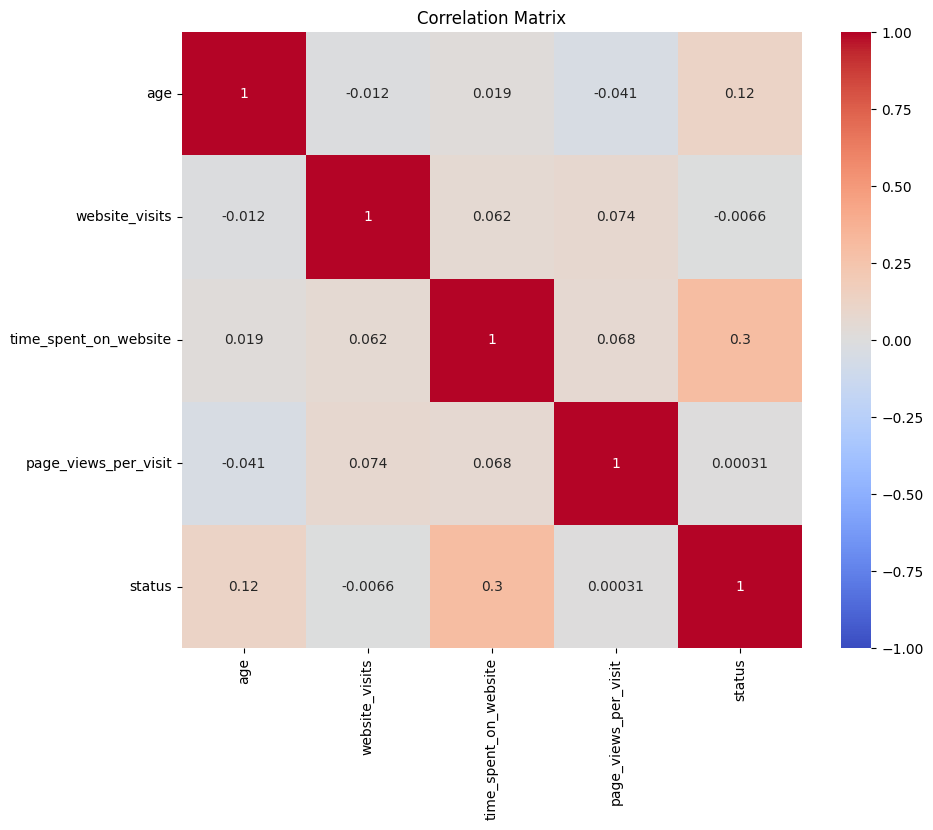

In [71]:
# select only numerical variables
numerical_columns = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']
numerical_df = df[numerical_columns]

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



**Observation:**

* There is a moderate positive correlation (0.3) between time_spent_on_website and status, indicating that leads who spend more time on the website are more likely to convert.
* age has a weak positive correlation (0.12) with status.
* Other numerical variables (website_visits, page_views_per_visit) have very weak or no correlation with status.

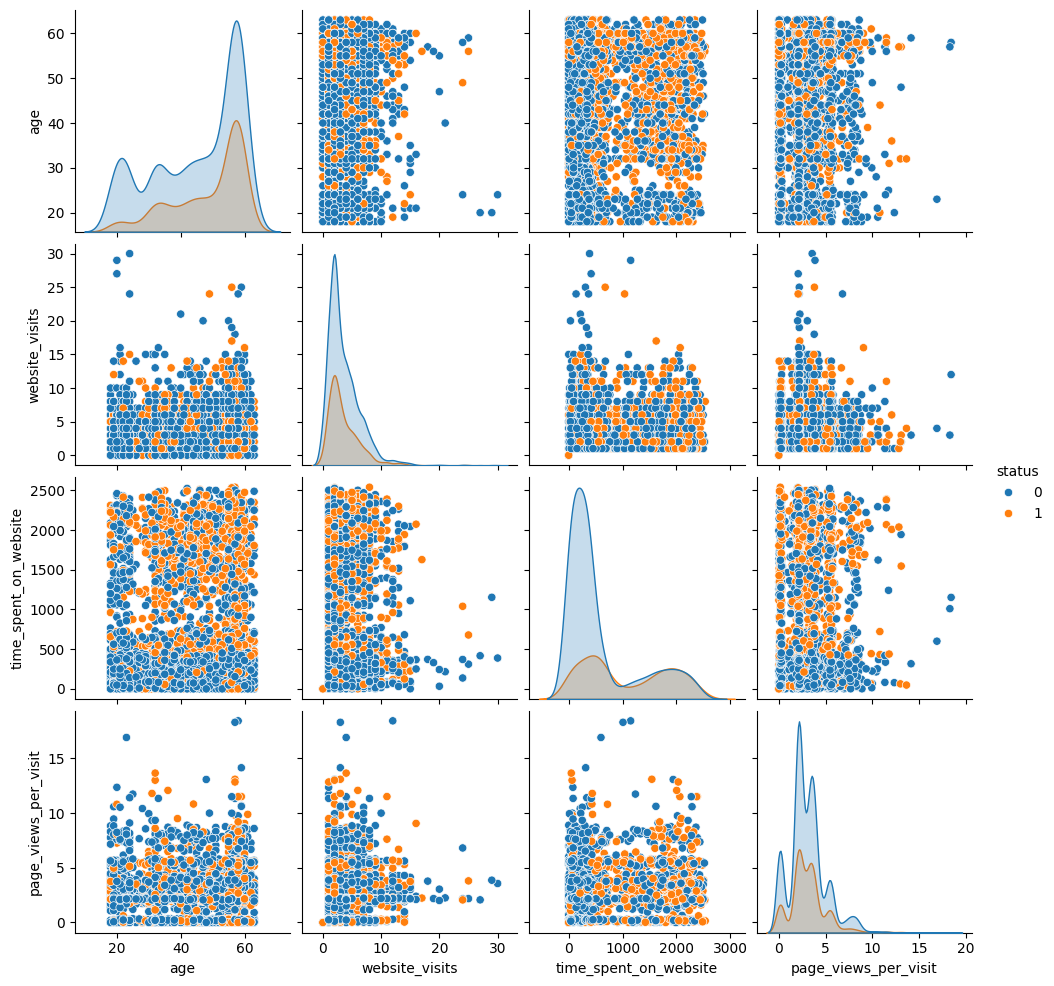

In [72]:
# pair plot for numerical variables
sns.pairplot(df, hue='status', vars=['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit'])
plt.show()


**Observation:**

* The distribution of age shows a peak around 50 years.
* There is a noticeable distinction in time_spent_on_website between converted and non-converted leads, with converted leads spending more time on the website.
* The scatter plots do not show strong linear relationships between most pairs of numerical variables.


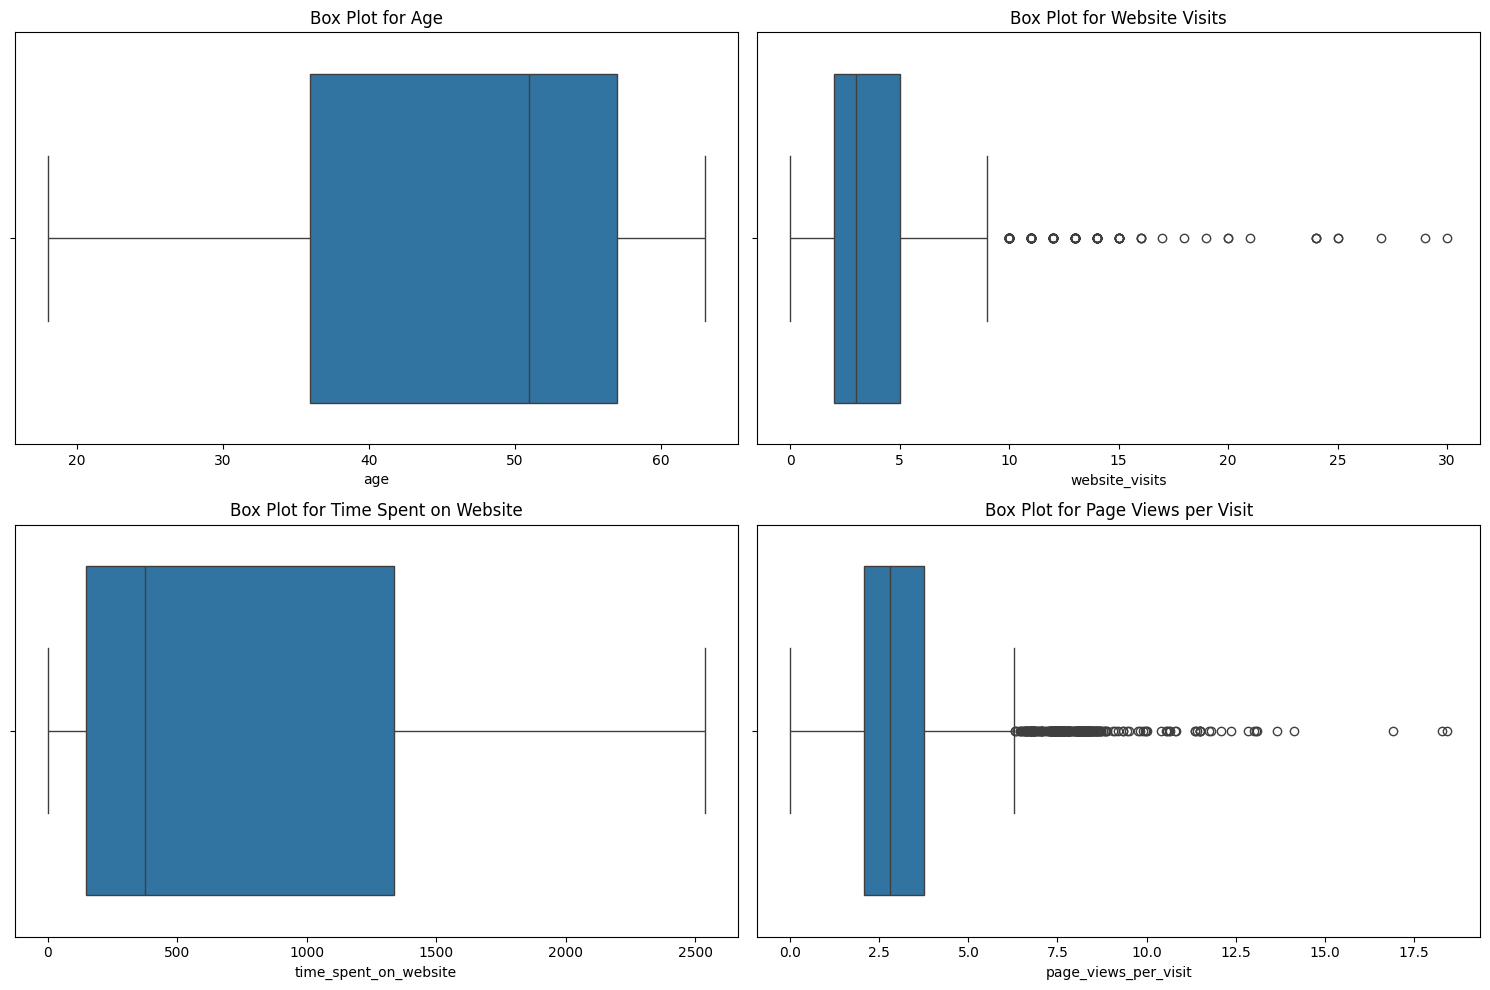

In [73]:
# box plots for numerical variables to detect outliers
plt.figure(figsize=(15, 10))

# age box plot
plt.subplot(2, 2, 1)
sns.boxplot(x=df['age'])
plt.title('Box Plot for Age')

# website visits box plot
plt.subplot(2, 2, 2)
sns.boxplot(x=df['website_visits'])
plt.title('Box Plot for Website Visits')

# time spent on website box plot
plt.subplot(2, 2, 3)
sns.boxplot(x=df['time_spent_on_website'])
plt.title('Box Plot for Time Spent on Website')

# page views per visit box plot
plt.subplot(2, 2, 4)
sns.boxplot(x=df['page_views_per_visit'])
plt.title('Box Plot for Page Views per Visit')

plt.tight_layout()
plt.show()


**Observation:**

* Website Visits: There are several outliers with high values (greater than 10 visits).
* Page Views per Visit: There are several outliers with high values (greater than 7 page views).

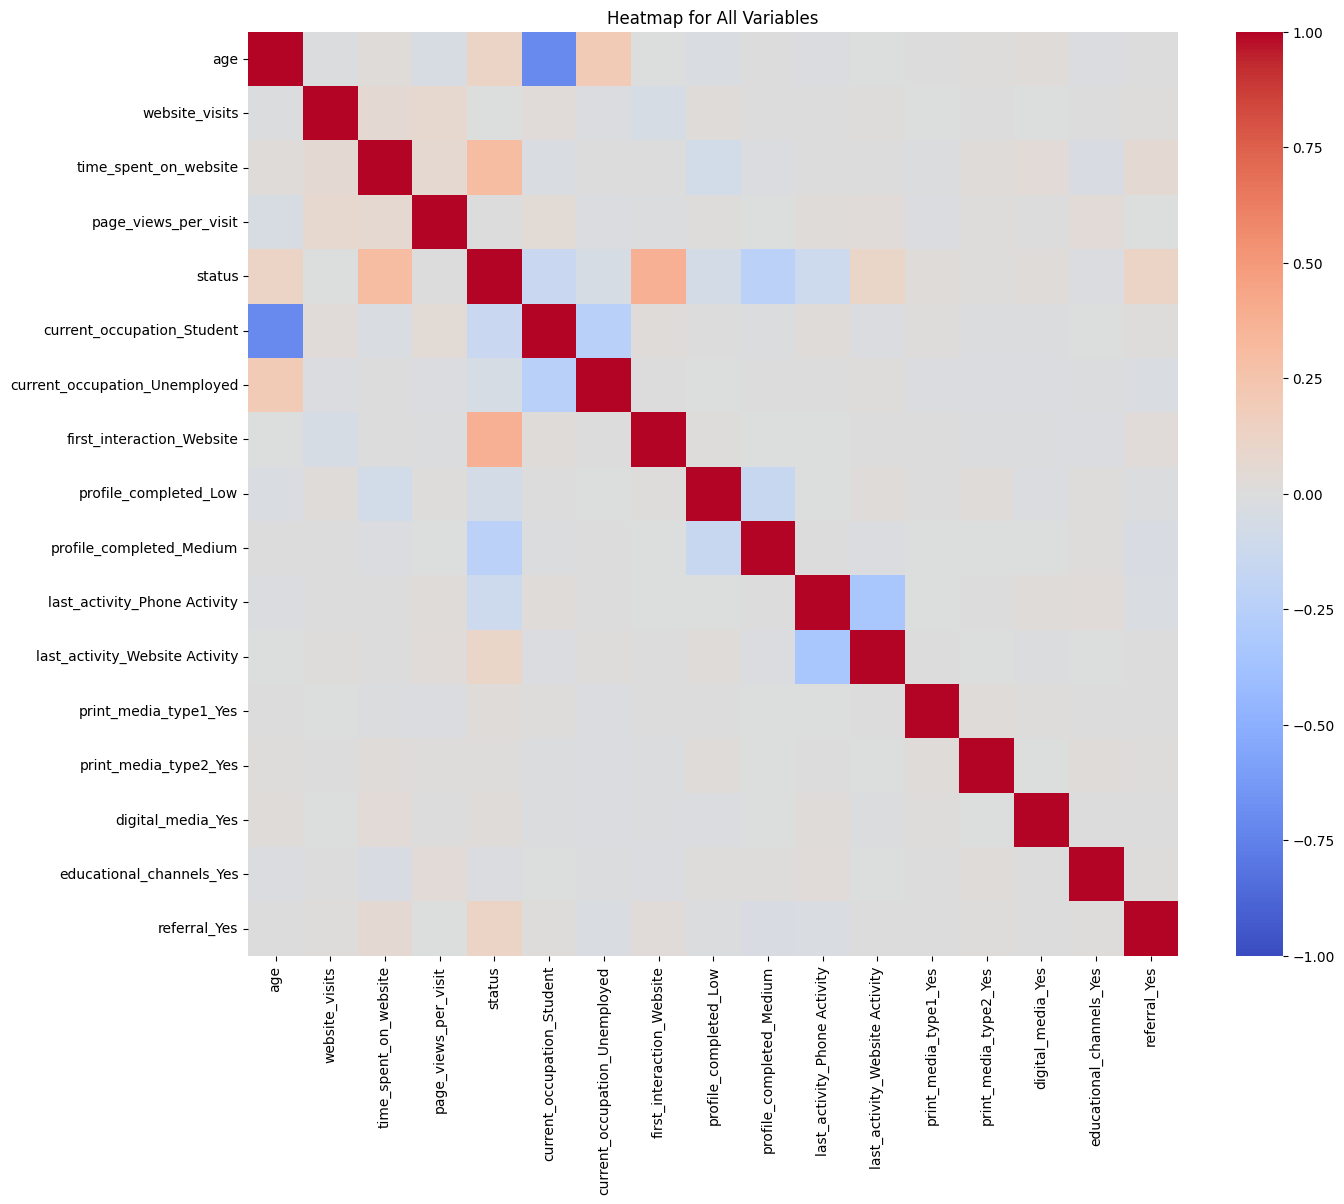

In [74]:
# drop the ID column
df_encoded = df.drop(columns=['ID'])

# encoding categorical variables to include them in the heatmap
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# geatmap for all variables
plt.figure(figsize=(15, 12))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap for All Variables')
plt.show()



**Observation:**

* There is a strong negative correlation between profile_completed_Low and status, indicating that low profile completion is associated with a lower likelihood of conversion.
* There is a strong positive correlation between profile_completed_High and status, indicating that high profile completion is associated with a higher likelihood of conversion.
* Other correlations include first_interaction_Website and status, showing a positive relationship.

## Data Preprocessing


### Missing value treatment



In [75]:
# check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# print a confirmation message
if missing_values.sum() == 0:
    print("No missing values found.")


ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64
No missing values found.


**Observation:**

* We've already verified that there are no missing values in the dataset, we can confirm this step by the above code.



---



### Feature engineering

In [76]:
# create age bins
df['age_bin'] = pd.cut(df['age'], bins=[0, 25, 45, 65], labels=['Young', 'Middle-aged', 'Senior'])

# verify the changes
print(df[['age', 'age_bin']].head())


   age age_bin
0   57  Senior
1   56  Senior
2   52  Senior
3   53  Senior
4   23   Young


In [77]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,age_bin
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1,Senior
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0,Senior
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0,Senior
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1,Senior
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0,Young


**Observation**

* I don't see any need for further feature engineering.
* age_bin was added as an easier way to classify the age groups



---



### Outlier detection and treatment

In [78]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,age_bin
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1,Senior
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0,Senior
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0,Senior
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1,Senior
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0,Young


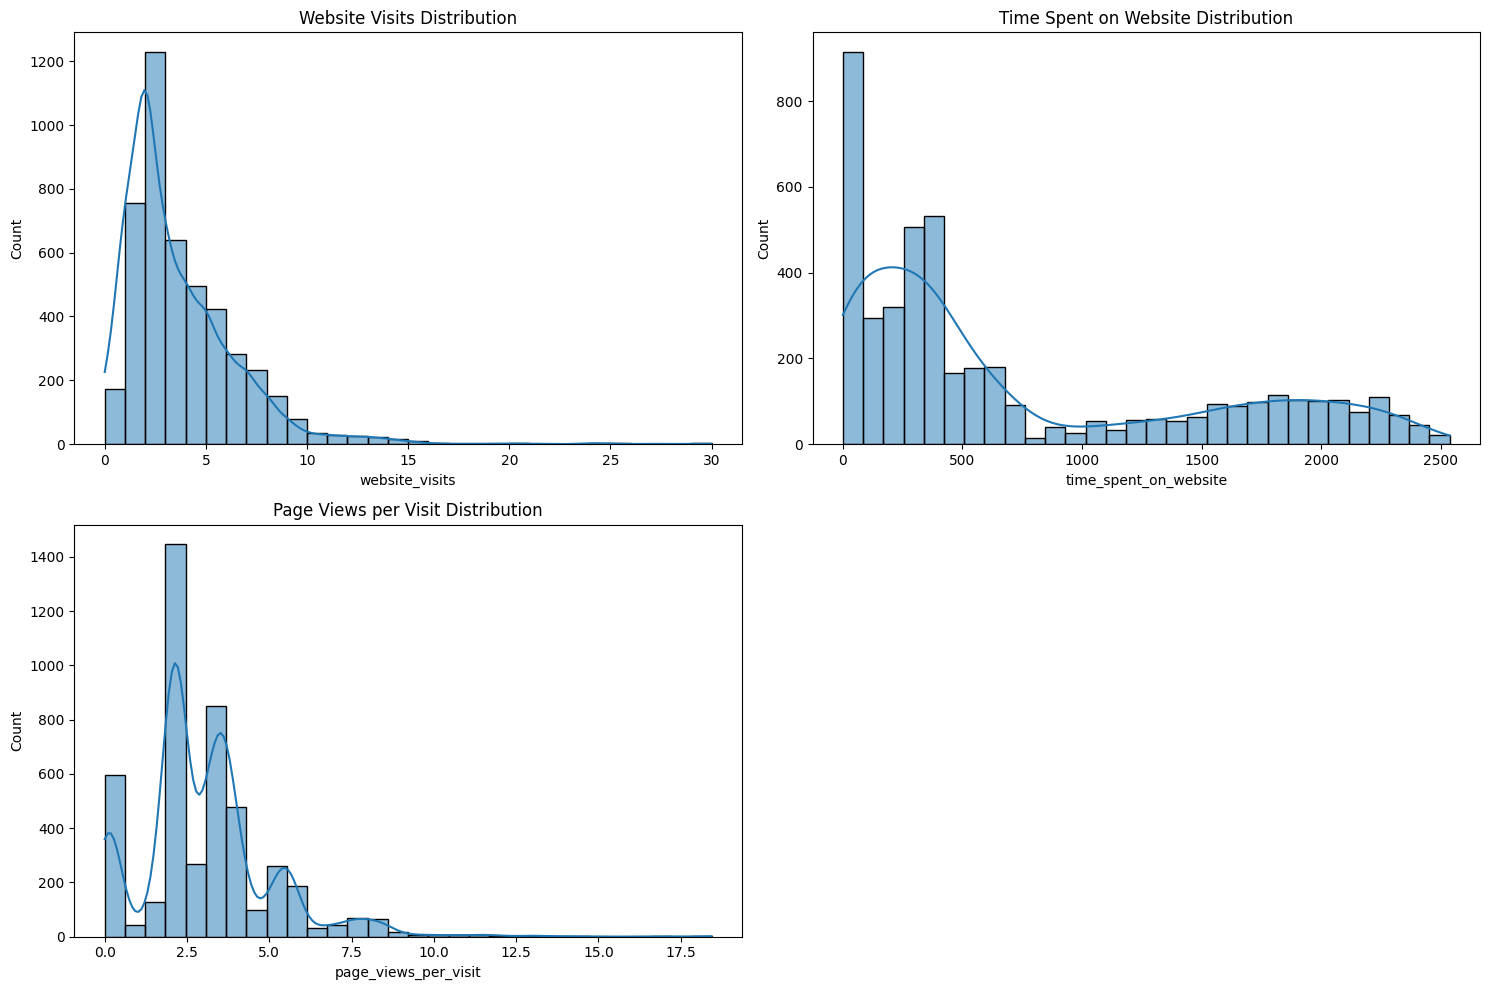

In [79]:
# plot the distributions of the numerical columns
plt.figure(figsize=(15, 10))

# Website visits distribution
plt.subplot(2, 2, 1)
sns.histplot(df['website_visits'], kde=True, bins=30)
plt.title('Website Visits Distribution')

# Time spent on website distribution
plt.subplot(2, 2, 2)
sns.histplot(df['time_spent_on_website'], kde=True, bins=30)
plt.title('Time Spent on Website Distribution')

# Page views per visit distribution
plt.subplot(2, 2, 3)
sns.histplot(df['page_views_per_visit'], kde=True, bins=30)
plt.title('Page Views per Visit Distribution')

plt.tight_layout()
plt.show()


**Observation**

- Given these distributions, it appears that the higher values might represent genuine user behavior rather than errors. In this context, it might be better to retain these values to capture the full range of user engagement, as they provide meaningful insights into user behavior.



---



### Preparing data for modeling

In [80]:
# Drop the ID column as it's not useful for modeling
df = df.drop(columns=['ID'])

# Verify the changes
print("Columns after dropping ID:")
df.head()

Columns after dropping ID:


,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,age_bin
0,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1,Senior
1,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0,Senior
2,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0,Senior
3,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1,Senior
4,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0,Young


In [81]:
# Encode Categorical Variables
# one-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# print changes
print("First few rows of the encoded dataset:")
print(df_encoded.head())


First few rows of the encoded dataset:
   age  website_visits  time_spent_on_website  page_views_per_visit  status  \
0   57               7                   1639               1.86100       1   
1   56               2                     83               0.32000       0   
2   52               3                    330               0.07400       0   
3   53               4                    464               2.05700       1   
4   23               4                    600              16.91400       0   

   current_occupation_Student  current_occupation_Unemployed  \
0                       False                           True   
1                       False                          False   
2                       False                          False   
3                       False                           True   
4                        True                          False   

   first_interaction_Website  profile_completed_Low  profile_completed_Medium  \
0                   

In [82]:
# Feature scaling code
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_columns = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# print changes
print("First few rows of the scaled dataset:")
print(df_encoded.head())


First few rows of the scaled dataset:
       age  website_visits  time_spent_on_website  page_views_per_visit  \
0  0.82057         1.21365                1.23024              -0.59206   
1  0.74459        -0.55386               -0.86187              -1.37513   
2  0.44064        -0.20036               -0.52976              -1.50013   
3  0.51662         0.15314               -0.34960              -0.49246   
4 -1.76301         0.15314               -0.16674               7.05716   

   status  current_occupation_Student  current_occupation_Unemployed  \
0       1                       False                           True   
1       0                       False                          False   
2       0                       False                          False   
3       1                       False                           True   
4       0                        True                          False   

   first_interaction_Website  profile_completed_Low  profile_completed_Medium 

In [83]:
# splitting the Data into Training and Test Sets
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = df_encoded.drop(columns=['status'])
y = df_encoded['status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (3228, 18)
Shape of X_test: (1384, 18)
Shape of y_train: (3228,)
Shape of y_test: (1384,)




---



## Logistic Regression

In [85]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# initialize the Logistic Regression model
log_reg = LogisticRegression()

# train the model
log_reg.fit(X_train, y_train)

# make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

# print the evaluation metrics
print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)
print("Classification Report:\n", class_report_log_reg)



Logistic Regression Accuracy: 0.8013005780346821
Confusion Matrix:
 [[860 117]
 [158 249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       977
           1       0.68      0.61      0.64       407

    accuracy                           0.80      1384
   macro avg       0.76      0.75      0.75      1384
weighted avg       0.80      0.80      0.80      1384



**Observation**

* I know the Logistic Regression Model wasn't part of the project but it acheived an accuracy of approximately 80%.

## Building a Decision Tree model




In [86]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

# Print the evaluation metrics
print("Decision Tree Accuracy:", accuracy_tree)
print("Confusion Matrix:\n", conf_matrix_tree)
print("Classification Report:\n", class_report_tree)


Decision Tree Accuracy: 0.8085260115606936
Confusion Matrix:
 [[845 132]
 [133 274]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       977
           1       0.67      0.67      0.67       407

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



**Observation**

* The Decision Tree model achieved an accuracy of approximately 80.85%

## Do we need to prune the tree?

In [87]:
# initialize the Decision Tree model with pruning parameters
pruned_tree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=20, min_samples_leaf=5)

# Train the pruned model
pruned_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pruned_tree = pruned_tree.predict(X_test)

# Evaluate the pruned model
accuracy_pruned_tree = accuracy_score(y_test, y_pred_pruned_tree)
conf_matrix_pruned_tree = confusion_matrix(y_test, y_pred_pruned_tree)
class_report_pruned_tree = classification_report(y_test, y_pred_pruned_tree)

# Print the evaluation metrics
print("Pruned Decision Tree Accuracy:", accuracy_pruned_tree)
print("Confusion Matrix:\n", conf_matrix_pruned_tree)
print("Classification Report:\n", class_report_pruned_tree)


Pruned Decision Tree Accuracy: 0.8547687861271677
Confusion Matrix:
 [[874 103]
 [ 98 309]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       977
           1       0.75      0.76      0.75       407

    accuracy                           0.85      1384
   macro avg       0.82      0.83      0.83      1384
weighted avg       0.86      0.85      0.86      1384



**Observation**

* The answe is simply yes here for pruning the tree.
* The pruned Decision Tree model has improved accuracy and performance metrics compared to the unpruned model.

## Building a Random Forest model

In [88]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_forest = random_forest.predict(X_test)

# Evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
class_report_forest = classification_report(y_test, y_pred_forest)

# Print the evaluation metrics
print("Random Forest Accuracy:", accuracy_forest)
print("Confusion Matrix:\n", conf_matrix_forest)
print("Classification Report:\n", class_report_forest)


Random Forest Accuracy: 0.8460982658959537
Confusion Matrix:
 [[900  77]
 [136 271]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       977
           1       0.78      0.67      0.72       407

    accuracy                           0.85      1384
   macro avg       0.82      0.79      0.81      1384
weighted avg       0.84      0.85      0.84      1384



**Observation**

* The Random Forest model has also performed well with an accuracy of 84.6%

## Do we need to prune the tree?

- Here we consider pruning the Random Forest by tuning its hyperparameters.

- We'll use GridSearchCV to find the best hyperparameters for the Random Forest model.

In [89]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 300}


* Now let's retrain the Random Forest model using these best parameters and evaluate its performance.

In [90]:
# Initialize the Random Forest model with the best parameters
pruned_random_forest = RandomForestClassifier(
    random_state=42,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=20,
    n_estimators=300
)

# Train the model
pruned_random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pruned_forest = pruned_random_forest.predict(X_test)

# Evaluate the model
accuracy_pruned_forest = accuracy_score(y_test, y_pred_pruned_forest)
conf_matrix_pruned_forest = confusion_matrix(y_test, y_pred_pruned_forest)
class_report_pruned_forest = classification_report(y_test, y_pred_pruned_forest)

# Print the evaluation metrics
print("Pruned Random Forest Accuracy:", accuracy_pruned_forest)
print("Confusion Matrix:\n", conf_matrix_pruned_forest)
print("Classification Report:\n", class_report_pruned_forest)


Pruned Random Forest Accuracy: 0.8583815028901735
Confusion Matrix:
 [[902  75]
 [121 286]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       977
           1       0.79      0.70      0.74       407

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.86      0.86      0.86      1384



* The pruned Random Forest model has improved performance metrics compared to the previous models but not a lot.

###Detailed Observations for Each Model

####Logistic Regression
Accuracy: 80.13%
Precision: 84% (Class 0), 68% (Class 1)
Recall: 88% (Class 0), 61% (Class 1)
F1-Score: 86% (Class 0), 64% (Class 1)
####Observations: Logistic Regression performs reasonably well but has lower precision and recall for Class 1 compared to the tree-based models.

####Decision Tree
Accuracy: 80.85%
Precision: 86% (Class 0), 67% (Class 1)
Recall: 86% (Class 0), 67% (Class 1)
F1-Score: 86% (Class 0), 67% (Class 1)
####Observations: The Decision Tree performs similarly to Logistic Regression, but it might overfit the training data without pruning.

####Pruned Decision Tree
Accuracy: 85.48%
Precision: 90% (Class 0), 75% (Class 1)
Recall: 89% (Class 0), 76% (Class 1)
F1-Score: 90% (Class 0), 75% (Class 1)
####Observations: Pruning significantly improved the Decision Tree's performance, making it more generalizable and better at predicting Class 1.

####Random Forest
Accuracy: 84.61%
Precision: 87% (Class 0), 78% (Class 1)
Recall: 92% (Class 0), 67% (Class 1)
F1-Score: 89% (Class 0), 72% (Class 1)
####Observations: The Random Forest model performs well, with balanced precision and recall, but there's room for improvement through hyperparameter tuning.

####Pruned Random Forest
Accuracy: 85.84%
Precision: 88% (Class 0), 79% (Class 1)
Recall: 92% (Class 0), 70% (Class 1)
F1-Score: 90% (Class 0), 74% (Class 1)
####Observations: Hyperparameter tuning improved the Random Forest model's performance, making it the best performing model among those tested.

## Actionable Insights and Recommendations

###Based on the analysis and model performance, here are some actionable insights and recommendations:

####Current Occupation's Impact on Conversion:

Professionals have the highest conversion rates, indicating that targeting marketing efforts towards this group may yield higher conversion rates.
Students have the lowest conversion rates, suggesting the need for tailored programs or incentives to increase their conversion rates.


####First Interaction Channel:

Leads who first interact via the Website have significantly higher conversion rates compared to those who use the Mobile App. Enhancing the mobile app experience to match the website's effectiveness could help improve conversions through this channel.


####Interaction Methods:

Website Activity as the last interaction has the highest conversion rates. Ensuring the website is engaging and provides all necessary information can help maintain high conversion rates.
Phone Activity has the lowest conversion rates. Analyzing and potentially improving the quality of phone interactions might help increase conversions.


####Marketing Channels:

Referrals show the highest conversion rates, suggesting that a referral program could be a valuable strategy to acquire new leads.
Print Media (newspapers and magazines) do not significantly impact conversion rates. Allocating marketing resources towards more effective channels like digital media and referrals might be beneficial.


####Profile Completion:

Leads with High Profile Completion are more likely to convert. Encouraging users to complete their profiles through incentives or reminders can help increase conversion rates.

####Model Insights:

The Pruned Random Forest model achieved the highest accuracy (85.84%), indicating it as a strong candidate for predicting lead conversions.
The Pruned Decision Tree model also performed well, suggesting it as another viable option.
Both models highlight the importance of features like profile_completed, first_interaction, and last_activity.



---

###Recommendations:

####Target Marketing:

Focus marketing efforts on professionals and improve engagement strategies for students.
Enhance the mobile app experience to increase conversions through this channel.

####Improve Interaction Methods:

Maintain a robust and engaging website experience.
Analyze and improve phone interaction strategies to increase their effectiveness.

####Leverage Referrals:

Develop and promote a referral program to leverage the high conversion rates from referred leads.

####Encourage Profile Completion:

Implement strategies to encourage leads to complete their profiles, such as providing incentives or sending reminders.

####Model Deployment:

Deploy the Pruned Random Forest model for lead conversion prediction.
Continuously monitor model performance and update as needed to maintain accuracy.





---



#Next Steps?

### Train the Final Model:

Retrain the Pruned Random Forest model on the entire dataset to leverage all available data for better performance.

###Save the Model:

Save the trained model using joblib or pickle for future use.



In [92]:
# install nbconvert to convert .ipynb to html
!pip install nbconvert


In [97]:
# set directory
%cd '/content/drive/MyDrive/Regression and Prediction/Project2'


/content/drive/MyDrive/Regression and Prediction/Project2


In [99]:
# convert to html file
!jupyter nbconvert --to html AmirFullCode-Potential+Customers+Prediction.ipynb

[NbConvertApp] Converting notebook AmirFullCode-Potential+Customers+Prediction.ipynb to html
[NbConvertApp] Writing 2171844 bytes to AmirFullCode-Potential+Customers+Prediction.html
